In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd
from pandas import read_csv
import os
from sklearn import preprocessing
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
np.random.seed(1)
tf.compat.v1.disable_v2_behavior() 
sns.set_theme(style="whitegrid")
if os.name == 'posix':
    plt.rc('font', family='AppleGothic')
elif os.name == 'nt':
    plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)
import shap
import warnings
import time



In [3]:
#seoul_pow
#pusan_pow
#jeju_pow
#kor_dust -> 종로
#kangil_dust
#kangdong_dust
#incheon_dust


DATA_NAME = 'seoul_0330'
MODEL_NAME = str(int(time.time()))
CLASSFICATION_EPOCH = 200
EPOCH = 150
FULLYCON = False
OTHER_FLAG = True


dataset = read_csv('./data/'+DATA_NAME+'.csv')
dataset['Hour'] = dataset['YMDH']%100
dataset=dataset[:365*24]
dataset_day = read_csv('./data/'+DATA_NAME+'_day.csv')
dataset_day['Hour'] = dataset_day['YMDH']%100
dataset_day=dataset_day[:365]
print('Data Cols / ',dataset.columns)

Data Cols /  Index(['Unnamed: 0', 'year', 'season', 'month', 'fullday', 'YMDH',
       'Precipitation', 'Wind speed', 'Humidity', 'Solar radiation',
       'Ground temperature', 'Cloud', 'pow', 'Hour'],
      dtype='object')


In [6]:
#일조 일사 해면기압 습도 지면온도
dataset['Hour']

0        1
1        2
2        3
3        4
4        5
        ..
8755    20
8756    21
8757    22
8758    23
8759     0
Name: Hour, Length: 8760, dtype: int64

In [7]:
Features = ['pow','Wind speed', 'Humidity','Solar radiation','Ground temperature','YMDH']
Target = 'pow'

               pow   Wind speed     Humidity  Solar radiation  \
count  8760.000000  8760.000000  8760.000000      8760.000000   
mean      1.399322     2.656952    62.796244         0.492443   
std       2.100388     1.426504    20.361059         0.747736   
min       0.000000     0.000000     0.000000         0.000000   
25%       0.000000     1.600000    48.000000         0.000000   
50%       0.013871     2.500000    63.000000         0.000000   
75%       2.432937     3.500000    79.000000         0.830000   
max       8.429358    10.500000   100.000000         3.630000   

       Ground temperature          YMDH  
count         8760.000000  8.760000e+03  
mean            15.109623  2.014067e+09  
std             12.665920  3.450216e+04  
min             -8.700000  2.014010e+09  
25%              2.500000  2.014040e+09  
50%             15.500000  2.014070e+09  
75%             24.200000  2.014100e+09  
max             52.400000  2.014123e+09  


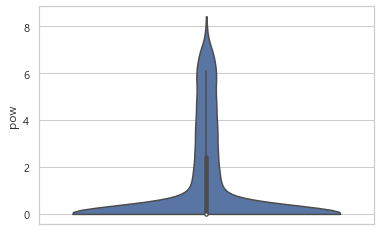

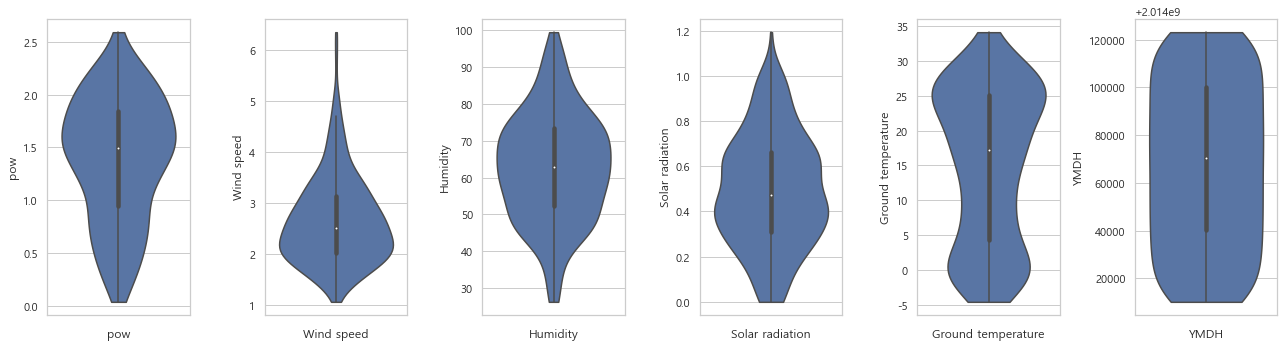

YMDH_FILTER   fullday       pow  Wind speed  Humidity  \
YMDH_FILTER            1.000000  1.000000 -0.023872   -0.063530  0.151710   
fullday                1.000000  1.000000 -0.023902   -0.063578  0.151762   
pow                   -0.023872 -0.023902  1.000000    0.266494 -0.506506   
Wind speed            -0.063530 -0.063578  0.266494    1.000000 -0.212577   
Humidity               0.151710  0.151762 -0.506506   -0.212577  1.000000   
Solar radiation       -0.041933 -0.041962  0.949811    0.262698 -0.475286   
Ground temperature     0.143679  0.143651  0.486955    0.109783  0.079072   
YMDH                   1.000000  1.000000 -0.023872   -0.063530  0.151710   

                    Solar radiation  Ground temperature      YMDH  
YMDH_FILTER               -0.041933            0.143679  1.000000  
fullday                   -0.041962            0.143651  1.000000  
pow                        0.949811            0.486955 -0.023872  
Wind speed                 0.262698            0.109783 -0.063530  
Humidity                  -0.475286            0.079072  0.151710  
Solar radiation            1.000000            0.528875 -0.041933  
Ground temperature         0.528875            1.000000  0.143679  
YMDH                      -0.041933            0.143679  1.000000

In [8]:


#Features = ['SO2', 'CO', 'O3','NO2', 'PM10', 'PM25']
#Target = 'PM25'

    
#Features.append('fullday')
#Features.append('YMDH')

print(dataset[Features].describe())

DF=dataset


TEST=DF[Features]
TEST_DAY = dataset_day[Features]

Target_LIST = DF[Target].to_list()
Fullday_LIST = DF['fullday'].to_list()
YMDH_LIST = DF['YMDH'].to_list()


TEST.insert(loc=0, column='fullday', value=Fullday_LIST)
TEST.insert(loc=0, column='YMDH_FILTER', value=YMDH_LIST)

sns.violinplot(y=DF[Target],cut=0)


'''
SCALED_Y = DF[[Target]].values.astype(float)
Y_min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
Target_LIST = Y_min_max_scaler.fit_transform(Target_LIST)
Target_LIST = list(Target_LIST)
'''


fig = plt.figure(figsize=(3*len(Features),5))
gs = fig.add_gridspec(1, len(Features))

for i in range(len(Features)):
    ax = fig.add_subplot(gs[0, i])
    sns.violinplot(y=TEST_DAY[Features[i]],cut=0)
    ax.set_xlabel(Features[i])

fig.tight_layout()
plt.show()

TEST.corr()

In [9]:


#['전력거래량','풍속(m/s)', '습도(%)','일사(MJ/m2)','지면온도(°C)','일조(hr)', '해면기압(hPa)']
#이하, 초과 [MAX, MIN]

#    '0': {
#        '기온(°C)': [[1.00, .75]],'강수량(mm)': [[1.00, .75]]
#    }, 
#['SO2', 'CO', 'O3','NO2', 'PM10', 'PM25']
'''
FeaturesRange = {
    '0': {
        'PM10': [[1.00, 0.25]]
    }, 
    '1': {
        'PM10': [[0.25, 0.20]]
    } 
}

FeaturesRange = {
    '0': {
        'Ground temperature': [[1.0, 0.75]]
    },
    '1': {
        'Ground temperature': [[0.75, 0.5]]
    },
    '2': {
        'Ground temperature': [[0.5, 0.25]]
    },
    '3': {
        'Ground temperature': [[0.25, -0.01]]
    }
}
'''
FeaturesRange = {
    '0': {
        'Solar radiation': [[1.0, 0.50]]
    },
    '1': {
        'Solar radiation': [[0.50, -0.1]]
    }
}


In [10]:

def GetSubSets(_DF,_dataset_day,FeaturesRange):
    
    full_df = _DF
    full_df['Group'] = 'Other'

    day_df = _dataset_day
    LAST_DAY = full_df[-2:-1]
    LAST_DAY = int(LAST_DAY['fullday'])
    CAP_DAY =[]
    print(LAST_DAY)
    

    #print(FeaturesRange)
    #{'0': {'temprt': [[80, 70]], 'rain': [[90, 78.2]], 'wnd_spd': [[100, 90]], 'humdt': [[80, 70]], 'cloud': [[100, 90]]}, '1': {'rain': [[100, 90]]}, '2': {'temprt': [[90, 80]], 'humdt': [[90, 80]]}, '3': {'temprt': [[100, 90]], 'humdt': [[100, 90]]}}
    #del FeaturesRange['0']
    
    res_GDF = []
    GroupDF = {}
    for Groups in FeaturesRange:
        TMP = FeaturesRange[Groups]
        GroupDF[Groups] = day_df
        for Feature in TMP:
            Filters = TMP[Feature]
            F_MAX = day_df[Feature].max()
            F_MIN = day_df[Feature].min()
            ABSRange = abs(F_MIN-F_MAX)
            for MAX,MIN in Filters:
                MAX=ABSRange*MAX
                MIN=ABSRange*MIN
                MAX = MAX+F_MIN
                MIN = MIN+F_MIN
                GroupDF[Groups] = GroupDF[Groups].loc[(GroupDF[Groups][Feature] > MIN) & (GroupDF[Groups][Feature] <= MAX)]

    for Groups in GroupDF:
        list_of_day = GroupDF[Groups]['fullday'].tolist()
        TMP_DATAFRAME = pd.DataFrame()
        CAP_DAY+=list_of_day
        if LAST_DAY in list_of_day:
            list_of_day.remove(LAST_DAY)
        
        for i in list_of_day:
            tmp_ST = full_df.loc[full_df['fullday']==i].index[0]
            TMP_DF = pd.DataFrame(full_df[tmp_ST:tmp_ST+24])
            TMP_DF.reset_index(inplace=True, drop=True)
            TMP_DF.insert(loc=0, column='TARGET', value=Target_LIST[tmp_ST+24:tmp_ST+48])
            
            TMP_DATAFRAME = pd.concat([TMP_DATAFRAME,TMP_DF],ignore_index=True)
            
        TMP_DATAFRAME['Group'] = Groups
        print(TMP_DATAFRAME.size)
        TMP_DATAFRAME.sort_values("YMDH_FILTER", ascending=True)
        res_GDF.append(TMP_DATAFRAME)
        
    full_df = full_df.shift(24)
    full_df.insert(loc=0, column='TARGET', value=Target_LIST)
    
    full_df = full_df.drop(full_df.loc[full_df['fullday'].isin(CAP_DAY)].index, errors='ignore')
    
    full_df=full_df.dropna(axis=0)

    full_df = full_df.sort_values("YMDH_FILTER", ascending=True)
    full_df.reset_index(inplace=True, drop=True)
    full_df['fullday'] = full_df['fullday'].astype(int)
    if not full_df.empty:
        res_GDF.append(full_df)
    else:
        print('OTHER_FLAG')
        OTHER_FLAG=False
    return res_GDF


In [11]:
RES_TEST = GetSubSets(TEST,dataset_day,FeaturesRange)
for Q in RES_TEST:
    print(Q.groupby('Group').count())


if len(RES_TEST)==len(FeaturesRange):
    OTHER_FLAG = False 

print(OTHER_FLAG)

#Features.remove('fullday')
#Features.remove('YMDH')



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


20141231
31200
56160
OTHER_FLAG
       TARGET  YMDH_FILTER  fullday   pow  Wind speed  Humidity  \
Group                                                             
0        3120         3120     3120  3120        3120      3120   

       Solar radiation  Ground temperature  YMDH  
Group                                             
0                 3120                3120  3120  
       TARGET  YMDH_FILTER  fullday   pow  Wind speed  Humidity  \
Group                                                             
1        5616         5616     5616  5616        5616      5616   

       Solar radiation  Ground temperature  YMDH  
Group                                             
1                 5616                5616  5616  
False


In [12]:

#'MINMAX'
#'STD'
#'YEO'
# ''
SCALE_FUNC = 'MINMAX'

def SCALE_FUCTIONS(_DF):
    TMP_TARGET = _DF['TARGET'].to_list()
    
    _DF=_DF[Features]
    if SCALE_FUNC == 'MINMAX':
        _DF = MINMAX_scaler.transform(_DF)
    elif SCALE_FUNC == 'STD':
        _DF = STD_scaler.transform(_DF.values)
    elif SCALE_FUNC == 'YEO':
        _DF = YEO_scaler.transform(_DF)
    else:
        _DF = _DF
    
    _DF = pd.DataFrame(_DF,columns=Features)
    _DF.insert(loc=0, column='TARGET', value=TMP_TARGET)
    return _DF
    
MINMAX_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
STD_scaler = preprocessing.StandardScaler()
YEO_scaler = preprocessing.PowerTransformer(method='yeo-johnson')

Y_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))

TEST = DF[Features]
MINMAX_scaler.fit(TEST)
STD_scaler.fit(TEST)
YEO_scaler.fit(TEST)

Y_scaler.fit(np.array(Target_LIST).reshape(-1,1))

ALL_X=DF[Features]
print(ALL_X)
ALL_X = ALL_X.shift(24)
ALL_X.insert(loc=0, column='TARGET', value=Target_LIST)
ALL_X=ALL_X.dropna(axis=0)
ALL_X.reset_index(inplace=True, drop=True)
ALL_X = SCALE_FUCTIONS(ALL_X)


for i in range(len(RES_TEST)):
    RES_TEST[i] = SCALE_FUCTIONS(RES_TEST[i])
    

      pow  Wind speed  Humidity  Solar radiation  Ground temperature  \
0     0.0         2.3      66.0              0.0                -0.1   
1     0.0         1.7      67.0              0.0                -0.3   
2     0.0         1.4      60.0              0.0                -0.4   
3     0.0         2.8      59.0              0.0                -0.6   
4     0.0         2.0      56.0              0.0                -0.7   
...   ...         ...       ...              ...                 ...   
8755  0.0         5.6      46.0              0.0                -0.7   
8756  0.0         4.0      46.0              0.0                -1.2   
8757  0.0         7.9      39.0              0.0                -1.9   
8758  0.0         7.1      31.0              0.0                -3.1   
8759  0.0         2.1      64.0              0.0                -0.3   

            YMDH  
0     2014010101  
1     2014010102  
2     2014010103  
3     2014010104  
4     2014010105  
...          ...  
87

divide by zero encountered in log


In [13]:
G_TRAIN_X = []
G_TRAIN_y = []

G_TEST_X = []
G_TEST_y = []

G_DISPLAY_Y = []
G_DISPLAY_TEST_Y = []
MIN_Y=float("inf")
MAX_Y=-1
for G in RES_TEST:
    values = G.values
    Xdata = values[:, 1:]
    Xdata = Xdata.reshape((int(Xdata.shape[0]/24),24,len(Features)))
    
    G_TRAIN_X.append(Xdata[:int(Xdata.shape[0]*0.8)])
    G_TEST_X.append(Xdata[int(Xdata.shape[0]*0.8):])
    
    Ydata = values[:, 0]
    Ydata = Ydata.reshape((int(len(Ydata)/24),24))
    
    Ydata = Ydata.sum(axis=1)
    Ydata = list(Ydata.reshape((Ydata.shape[0],)))
    if MIN_Y>min(Ydata):
        MIN_Y = min(Ydata)
    if MAX_Y<max(Ydata):
        MAX_Y = max(Ydata)
    
    G_DISPLAY_Y = G_DISPLAY_Y+Ydata[:int(len(Ydata)*0.8)]
    G_DISPLAY_TEST_Y= G_DISPLAY_TEST_Y + Ydata[int(len(Ydata)*0.8):]
    
    if FULLYCON:
        Ydata = Ydataa.reshape((Ydata.shape[0],Ydata.shape[1],1))

    G_TRAIN_y.append(Ydata[:int(len(Ydata)*0.8)])
    G_TEST_y.append(Ydata[int(len(Ydata)*0.8):])



CLASSIFI_X = G_TRAIN_X[0]
CLASSIFI_y = [0 for _ in range(G_TRAIN_X[0].shape[0])]

CLASSIFI_TEST_X = G_TEST_X[0]
CLASSIFI_TEST_y = [0 for _ in range(G_TEST_X[0].shape[0])]

for G in range(1,len(RES_TEST)):
    CLASSIFI_X = np.concatenate((CLASSIFI_X, G_TRAIN_X[G]), axis=0)
    CLASSIFI_y = CLASSIFI_y + [G for _ in range(G_TRAIN_X[G].shape[0])]
    
    CLASSIFI_TEST_X = np.concatenate((CLASSIFI_TEST_X, G_TEST_X[G]), axis=0)
    CLASSIFI_TEST_y = CLASSIFI_TEST_y + [G for _ in range(G_TEST_X[G].shape[0])]

CLASSIFI_X = CLASSIFI_X.reshape((CLASSIFI_X.shape[0],CLASSIFI_X.shape[1]*CLASSIFI_X.shape[2]))
CLASSIFI_TEST_X = CLASSIFI_TEST_X.reshape((CLASSIFI_TEST_X.shape[0],CLASSIFI_TEST_X.shape[1]*CLASSIFI_TEST_X.shape[2]))

CLASSIFI_y = np.array(CLASSIFI_y)
CLASSIFI_y_Dis = CLASSIFI_y
CLASSIFI_y = pd.get_dummies(CLASSIFI_y)

CLASSIFI_TEST_y
CLASSIFI_TEST_y = np.array(CLASSIFI_TEST_y)
CLASSIFI_TEST_y_Dis = CLASSIFI_TEST_y
CLASSIFI_TEST_y = pd.get_dummies(CLASSIFI_TEST_y)

for i in range(len(G_TRAIN_y)):
    G_TRAIN_y[i] = list(Y_scaler.transform(np.array(G_TRAIN_y[i]).reshape(-1,1)).flatten())


In [14]:

values = ALL_X.values
Xdata = values[:, 1:]
Xdata = Xdata.reshape((int(Xdata.shape[0]/24),24,len(Features)))
    
ALL_TRAIN_X=Xdata[:int(Xdata.shape[0]*0.8)]
    
Ydata = values[:, 0]
Ydata = Ydata.reshape((int(len(Ydata)/24),24))
    
Ydata = Ydata.sum(axis=1)
Ydata = list(Ydata.reshape((Ydata.shape[0],)))

ALL_DISPLAY_Y = []

ALL_DISPLAY_Y = ALL_DISPLAY_Y+Ydata[:int(len(Ydata)*0.8)]
    
ALL_TRAIN_y = Ydata[:int(len(Ydata)*0.8)]

ALL_TRAIN_y = list(Y_scaler.transform(np.array(ALL_TRAIN_y).reshape(-1,1)).flatten())


In [15]:
#CLASSFICATION_PATH = MODEL_PATH+'/'+MODEL_NAME+'_CLASSIFICATION.h5'

import random

testlinC = []
for i in range(100):
    testlinC.append(random.randint(0, CLASSIFI_TEST_X.shape[0]-1))

enTest_X = CLASSIFI_TEST_X[testlinC, :]
enTest_y = CLASSIFI_TEST_y_Dis[testlinC]

enTest_dis_y= G_DISPLAY_TEST_Y[:]
enTest_dis_y = np.vstack(enTest_dis_y)
enTest_dis_y = enTest_dis_y[testlinC,:]

print(enTest_dis_y.shape)

print(enTest_X.shape)

(100, 1)
(100, 144)


In [16]:
MODEL_PATH ='models/'+DATA_NAME+'/'+MODEL_NAME 
os.makedirs(MODEL_PATH, exist_ok=True)

tp = pd.DataFrame( data = {'MIN_Y': [MIN_Y],'MAX_Y': [MAX_Y] } )
tp.to_csv(MODEL_PATH+'/'+MODEL_NAME+'_MINMAX.csv')

weights_dict = [dict() for _ in range(len(RES_TEST))]
def TEMPFUNC(TI):
    return models[TI].predict(G_TRAIN_X[TI])

def build_model(train_X, train_y ):
    M = tf.keras.Sequential()

    if FULLYCON:
        M.add(tf.keras.layers.LSTM(200,  input_shape = (train_X.shape[1], train_X.shape[2])))
        M.add(tf.keras.layers.RepeatVector(24))
        M.add(tf.keras.layers.LSTM(200,  return_sequences=True))
        M.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(100, activation='relu')))
        M.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(1)))
    else:
        M.add(tf.keras.layers.LSTM(50,  input_shape = (train_X.shape[1], train_X.shape[2])))
        M.add(tf.keras.layers.Dense(5, activation='relu'))
        M.add(tf.keras.layers.Dense(1))

    optimizer = tf.keras.optimizers.Adam()

    M.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mean_squared_logarithmic_error','mean_squared_error'])
    return M


#mean_absolute_error

models = []
for GN in range(len(RES_TEST)):
    models.append(build_model(G_TRAIN_X[GN],G_TRAIN_y[GN]))
        # Open the file
    with open(MODEL_PATH + '/'+str(GN)+'_summary.txt','w') as fh:
        models[GN].summary(print_fn=lambda x: fh.write(x + '\n'))

ALL_MODEL = build_model(ALL_TRAIN_X,ALL_TRAIN_y)
ALL_MODEL.fit(ALL_TRAIN_X, ALL_TRAIN_y, epochs=EPOCH, verbose=1, shuffle=False)

for GN in range(len(models)):
    GNAME = str(GN)
    if GN == len(models)-1 and OTHER_FLAG:
        GNAME = 'Other'
        
    _path = 'models/'+DATA_NAME+'/'+MODEL_NAME+'/G_'+GNAME
    os.makedirs(_path, exist_ok=True)
    weight_callback = tf.keras.callbacks.LambdaCallback( on_epoch_end=lambda epoch, logs: weights_dict[GN].update({epoch:TEMPFUNC(GN)}))
    csv_logger = tf.keras.callbacks.CSVLogger(_path+'/'+DATA_NAME+'_G_'+GNAME+'_epoch'+'.csv', separator=',')
    
    models[GN].fit(G_TRAIN_X[GN], G_TRAIN_y[GN], epochs=EPOCH, verbose=1, shuffle=False, callbacks=[weight_callback,csv_logger] )

    BIAS_DEF = []
    VAR_DEF = []
    for T in weights_dict[GN]:
        YT = weights_dict[GN][T]
        YT_var = [np.mean(x) for x in YT]
        var = [pow(np.mean(x)-np.mean(YT_var),2) for x in YT]
        bias = []
        for Gi in range(0,len(G_TRAIN_y[GN])):
            bias.append(pow(np.mean(G_TRAIN_y[GN][Gi]) - YT[Gi],2))
        VAR_DEF.append(np.mean(var))
        BIAS_DEF.append(np.mean(bias))
    BV = pd.DataFrame( data = {'BIAS': BIAS_DEF, 'VAR': VAR_DEF} )
    
    models[GN].save(_path+'/'+DATA_NAME+'_G_'+GNAME+'.h5')
    BV.to_csv(_path+'/'+DATA_NAME+'_G_'+GNAME+'_BIAS_VAR'+'.csv', index=False) 

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 291 samples
Epoch 1/150
291/291 [==============================] - 0s 141us/sample - loss: 20.4221 - mean_squared_logarithmic_error: 2.6448 - mean_squared_error: 20.4221
Epoch 2/150
291/291 [==============================] - 0s 141us/sample - loss: 20.3392 - mean_squared_logarithmic_error: 2.6140 - mean_squared_error: 20.3392
Epoch 3/150
291/291 [==============================] - 0s 147us/sample - loss: 20.2566 - mean_squared_logarithmic_error: 2.5837 - mean_squared_error: 20.2566
Epoch 4/150
291/291 [==============================] - 0s 141us/sample - loss: 20.1743 - mean_squared_logarithmic_error: 2.5539 - mean_squared_error: 20.1743
Epoch 5/150
291/291 [==============================] - 0s 147us/sample - loss: 20.0923 - mean_squared_logarithmic_error: 2.5246 - mean_squared_error: 20.0923
Epoch 6/150
291/291 [==============================] - 0s 144us/sample - loss: 20.0107 - mean_squared_logari

291/291 [==============================] - 0s 147us/sample - loss: 16.6980 - mean_squared_logarithmic_error: 1.5813 - mean_squared_error: 16.6980
Epoch 51/150
291/291 [==============================] - 0s 141us/sample - loss: 16.6287 - mean_squared_logarithmic_error: 1.5663 - mean_squared_error: 16.6286
Epoch 52/150
291/291 [==============================] - 0s 141us/sample - loss: 16.5596 - mean_squared_logarithmic_error: 1.5516 - mean_squared_error: 16.5596
Epoch 53/150
291/291 [==============================] - 0s 144us/sample - loss: 16.4908 - mean_squared_logarithmic_error: 1.5370 - mean_squared_error: 16.4908
Epoch 54/150
291/291 [==============================] - 0s 141us/sample - loss: 16.4223 - mean_squared_logarithmic_error: 1.5225 - mean_squared_error: 16.4222
Epoch 55/150
291/291 [==============================] - 0s 147us/sample - loss: 16.3540 - mean_squared_logarithmic_error: 1.5083 - mean_squared_error: 16.3540
Epoch 56/150
291/291 [==============================] - 0s 

291/291 [==============================] - 0s 137us/sample - loss: 13.4715 - mean_squared_logarithmic_error: 1.0059 - mean_squared_error: 13.4715
Epoch 102/150
291/291 [==============================] - 0s 130us/sample - loss: 13.4142 - mean_squared_logarithmic_error: 0.9975 - mean_squared_error: 13.4142
Epoch 103/150
291/291 [==============================] - 0s 137us/sample - loss: 13.3572 - mean_squared_logarithmic_error: 0.9893 - mean_squared_error: 13.3572
Epoch 104/150
291/291 [==============================] - 0s 130us/sample - loss: 13.3003 - mean_squared_logarithmic_error: 0.9812 - mean_squared_error: 13.3004
Epoch 105/150
291/291 [==============================] - 0s 130us/sample - loss: 13.2437 - mean_squared_logarithmic_error: 0.9731 - mean_squared_error: 13.2437
Epoch 106/150
291/291 [==============================] - 0s 127us/sample - loss: 13.1873 - mean_squared_logarithmic_error: 0.9652 - mean_squared_error: 13.1873
Epoch 107/150
291/291 [==============================]

104/104 [==============================] - 0s 825us/sample - loss: 24.6339 - mean_squared_logarithmic_error: 2.9241 - mean_squared_error: 24.6339
Epoch 2/150
104/104 [==============================] - 0s 192us/sample - loss: 24.0610 - mean_squared_logarithmic_error: 2.7542 - mean_squared_error: 24.0610
Epoch 3/150
104/104 [==============================] - 0s 182us/sample - loss: 23.6491 - mean_squared_logarithmic_error: 2.6233 - mean_squared_error: 23.6491
Epoch 4/150
104/104 [==============================] - 0s 201us/sample - loss: 23.0512 - mean_squared_logarithmic_error: 2.4463 - mean_squared_error: 23.0512
Epoch 5/150
104/104 [==============================] - 0s 211us/sample - loss: 22.1570 - mean_squared_logarithmic_error: 2.2067 - mean_squared_error: 22.1570
Epoch 6/150
104/104 [==============================] - 0s 211us/sample - loss: 20.7430 - mean_squared_logarithmic_error: 1.8780 - mean_squared_error: 20.7430
Epoch 7/150
104/104 [==============================] - 0s 192us/

104/104 [==============================] - 0s 201us/sample - loss: 2.4818 - mean_squared_logarithmic_error: 0.1053 - mean_squared_error: 2.4818
Epoch 54/150
104/104 [==============================] - 0s 192us/sample - loss: 2.4818 - mean_squared_logarithmic_error: 0.1053 - mean_squared_error: 2.4818
Epoch 55/150
104/104 [==============================] - 0s 182us/sample - loss: 2.4818 - mean_squared_logarithmic_error: 0.1053 - mean_squared_error: 2.4818
Epoch 56/150
104/104 [==============================] - 0s 221us/sample - loss: 2.4819 - mean_squared_logarithmic_error: 0.1053 - mean_squared_error: 2.4819
Epoch 57/150
104/104 [==============================] - 0s 201us/sample - loss: 2.4819 - mean_squared_logarithmic_error: 0.1053 - mean_squared_error: 2.4819
Epoch 58/150
104/104 [==============================] - 0s 201us/sample - loss: 2.4819 - mean_squared_logarithmic_error: 0.1053 - mean_squared_error: 2.4819
Epoch 59/150
104/104 [==============================] - 0s 221us/sample

104/104 [==============================] - 0s 211us/sample - loss: 2.4820 - mean_squared_logarithmic_error: 0.1053 - mean_squared_error: 2.4820
Epoch 106/150
104/104 [==============================] - 0s 221us/sample - loss: 2.4820 - mean_squared_logarithmic_error: 0.1053 - mean_squared_error: 2.4820
Epoch 107/150
104/104 [==============================] - 0s 201us/sample - loss: 2.4820 - mean_squared_logarithmic_error: 0.1053 - mean_squared_error: 2.4820
Epoch 108/150
104/104 [==============================] - 0s 173us/sample - loss: 2.4820 - mean_squared_logarithmic_error: 0.1053 - mean_squared_error: 2.4820
Epoch 109/150
104/104 [==============================] - 0s 192us/sample - loss: 2.4820 - mean_squared_logarithmic_error: 0.1053 - mean_squared_error: 2.4820
Epoch 110/150
104/104 [==============================] - 0s 192us/sample - loss: 2.4820 - mean_squared_logarithmic_error: 0.1053 - mean_squared_error: 2.4820
Epoch 111/150
104/104 [==============================] - 0s 221us/

187/187 [==============================] - 0s 171us/sample - loss: 2.8779 - mean_squared_logarithmic_error: 0.2100 - mean_squared_error: 2.8779
Epoch 7/150
187/187 [==============================] - 0s 192us/sample - loss: 2.6202 - mean_squared_logarithmic_error: 0.1811 - mean_squared_error: 2.6202
Epoch 8/150
187/187 [==============================] - 0s 187us/sample - loss: 2.7164 - mean_squared_logarithmic_error: 0.1769 - mean_squared_error: 2.7164
Epoch 9/150
187/187 [==============================] - 0s 171us/sample - loss: 2.6706 - mean_squared_logarithmic_error: 0.1770 - mean_squared_error: 2.6706
Epoch 10/150
187/187 [==============================] - 0s 181us/sample - loss: 2.6062 - mean_squared_logarithmic_error: 0.1804 - mean_squared_error: 2.6062
Epoch 11/150
187/187 [==============================] - 0s 192us/sample - loss: 2.6022 - mean_squared_logarithmic_error: 0.1848 - mean_squared_error: 2.6022
Epoch 12/150
187/187 [==============================] - 0s 176us/sample - 

187/187 [==============================] - 0s 171us/sample - loss: 2.1275 - mean_squared_logarithmic_error: 0.1533 - mean_squared_error: 2.1275
Epoch 59/150
187/187 [==============================] - 0s 181us/sample - loss: 2.1374 - mean_squared_logarithmic_error: 0.1514 - mean_squared_error: 2.1374
Epoch 60/150
187/187 [==============================] - 0s 187us/sample - loss: 2.1460 - mean_squared_logarithmic_error: 0.1569 - mean_squared_error: 2.1460
Epoch 61/150
187/187 [==============================] - 0s 181us/sample - loss: 2.1841 - mean_squared_logarithmic_error: 0.1498 - mean_squared_error: 2.1841
Epoch 62/150
187/187 [==============================] - 0s 192us/sample - loss: 2.1690 - mean_squared_logarithmic_error: 0.1587 - mean_squared_error: 2.1690
Epoch 63/150
187/187 [==============================] - 0s 176us/sample - loss: 2.2383 - mean_squared_logarithmic_error: 0.1517 - mean_squared_error: 2.2383
Epoch 64/150
187/187 [==============================] - 0s 176us/sample

187/187 [==============================] - 0s 176us/sample - loss: 2.0934 - mean_squared_logarithmic_error: 0.1412 - mean_squared_error: 2.0934
Epoch 111/150
187/187 [==============================] - 0s 192us/sample - loss: 1.9555 - mean_squared_logarithmic_error: 0.1467 - mean_squared_error: 1.9555
Epoch 112/150
187/187 [==============================] - 0s 192us/sample - loss: 1.9808 - mean_squared_logarithmic_error: 0.1383 - mean_squared_error: 1.9808
Epoch 113/150
187/187 [==============================] - 0s 197us/sample - loss: 2.0268 - mean_squared_logarithmic_error: 0.1509 - mean_squared_error: 2.0268
Epoch 114/150
187/187 [==============================] - 0s 176us/sample - loss: 1.9599 - mean_squared_logarithmic_error: 0.1353 - mean_squared_error: 1.9599
Epoch 115/150
187/187 [==============================] - 0s 187us/sample - loss: 1.9774 - mean_squared_logarithmic_error: 0.1471 - mean_squared_error: 1.9774
Epoch 116/150
187/187 [==============================] - 0s 219us/

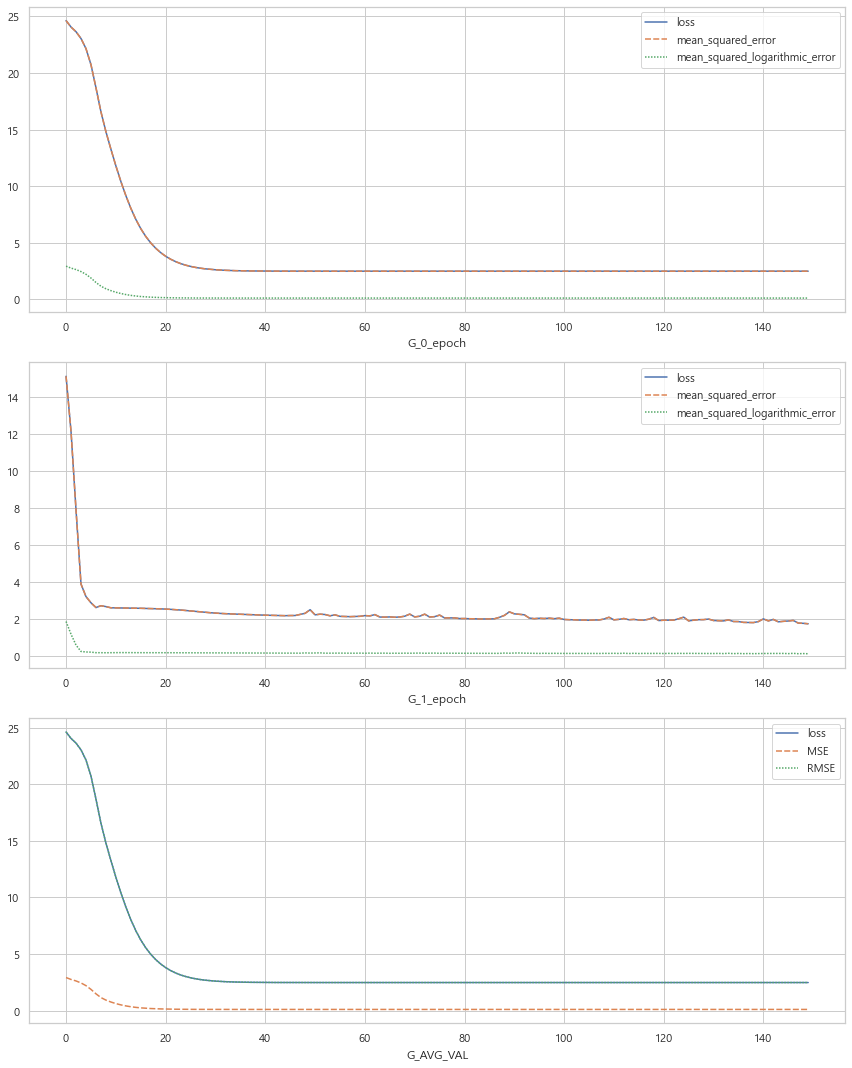

In [17]:
fig = plt.figure(figsize=(12,5*(len(models)+1)))
gs = fig.add_gridspec( (len(models)+1),1)

MSE = []
MAE = []
RMSE = []

for GN in range(len(models)):
    GNAME = str(GN)
    if GN == len(models)-1 and OTHER_FLAG:
        GNAME = 'Other'
    _path = 'models/'+DATA_NAME+'/'+MODEL_NAME+'/G_'+GNAME
    TDF = read_csv(_path+'/'+DATA_NAME+'_G_'+GNAME+'_epoch'+'.csv')
    ax = fig.add_subplot(gs[GN, 0])
    sns.lineplot(data=TDF[TDF.columns.difference(['epoch'])], legend=True)
    ax.set_xlabel('G_'+GNAME+'_epoch')
    if GN != len(models)-1:
        MAE.append(TDF['loss'].to_list())
        MSE.append(TDF['mean_squared_logarithmic_error'].to_list())
        RMSE.append(TDF['mean_squared_error'].to_list())
        
MSE = np.array(MSE)
MAE = np.array(MAE)
RMSE = np.array(RMSE)

BV = pd.DataFrame( data = {'loss': MAE.mean(axis=0), 'MSE': MSE.mean(axis=0), 'RMSE':RMSE.mean(axis=0)} )
BV.to_csv(MODEL_PATH+'/'+MODEL_NAME+'_loss.csv', index=False)
ax = fig.add_subplot(gs[GN+1, 0])
sns.lineplot(data=BV, legend=True)
ax.set_xlabel('G_AVG_VAL')

fig.tight_layout()
plt.savefig(MODEL_PATH+'/Models_LOSS.png')
plt.show()

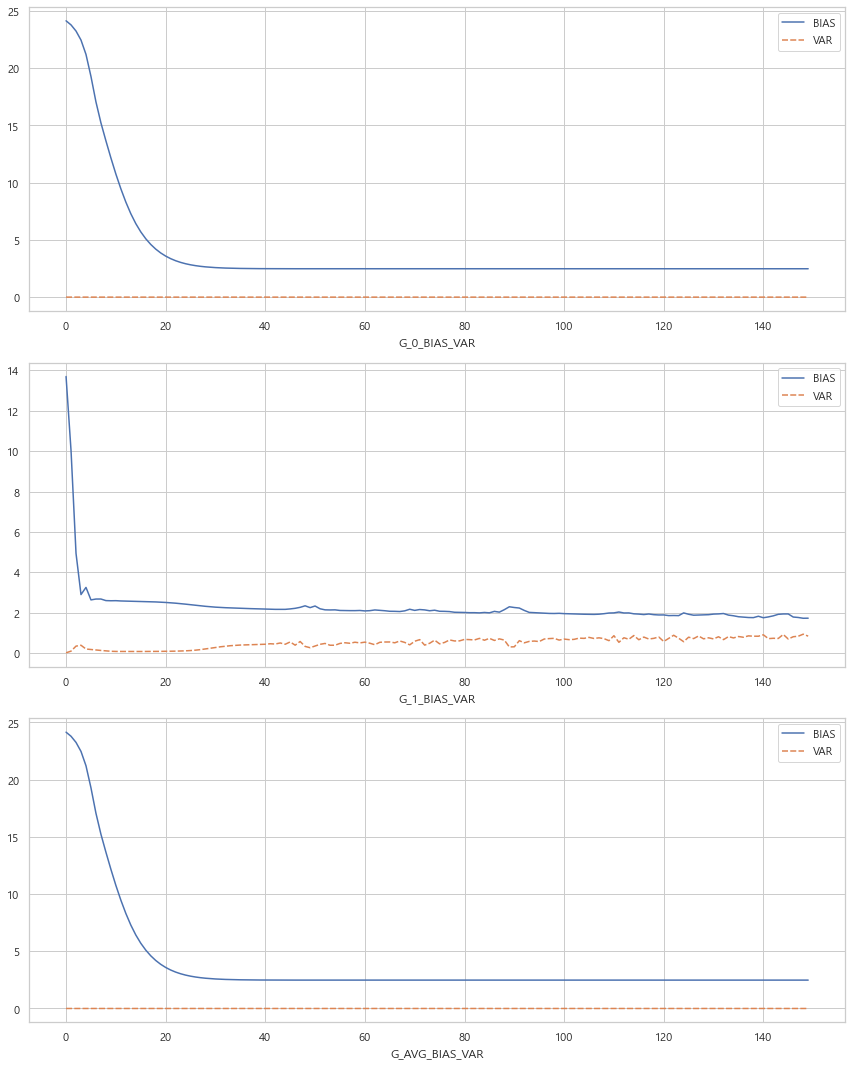

In [18]:
fig = plt.figure(figsize=(12,5*(len(models)+1)))
gs = fig.add_gridspec( (len(models)+1),1)

BIAS = []
VAR = []

for GN in range(len(models)):
    GNAME = str(GN)
    if GN == len(models)-1 and OTHER_FLAG:
        GNAME = 'Other'
    _path = 'models/'+DATA_NAME+'/'+MODEL_NAME+'/G_'+GNAME
    TDF = read_csv(_path+'/'+DATA_NAME+'_G_'+GNAME+'_BIAS_VAR'+'.csv')
    ax = fig.add_subplot(gs[GN, 0])
    sns.lineplot(data=TDF, legend=True)
    if GN != len(models)-1:
        BIAS.append(TDF['BIAS'].to_list())
        VAR.append(TDF['VAR'].to_list())

    ax.set_xlabel('G_'+GNAME+'_BIAS_VAR')
BIAS = np.array(BIAS)
VAR = np.array(VAR)

BV = pd.DataFrame( data = {'BIAS': BIAS.mean(axis=0), 'VAR': VAR.mean(axis=0)} )

ax = fig.add_subplot(gs[GN+1, 0])
sns.lineplot(data=BV, legend=True)
ax.set_xlabel('G_AVG_BIAS_VAR')
BV.to_csv(MODEL_PATH+'/'+MODEL_NAME+'_BIAS_VAR.csv', index=False)

fig.tight_layout()
plt.savefig(MODEL_PATH+'/Models_BIAS_VAR.png')
plt.show()
    

In [19]:
ENS_MODELS = []
for GN in range(len(models)):
    GNAME = str(GN)
    if GN == len(models)-1 and OTHER_FLAG:
        GNAME = 'Other'
    _path = 'models/'+DATA_NAME+'/'+MODEL_NAME+'/G_'+GNAME
    ENS_MODELS.append(tf.keras.models.load_model(_path+'/'+DATA_NAME+'_G_'+GNAME+'.h5'))

#_path = 'models/'+DATA_NAME+'/'+MODEL_NAME+'/G_All'
#ALL_MODELS = tf.keras.models.load_model(_path+'/'+DATA_NAME+'_G_All.h5')
#MD = tf.keras.models.load_model(CLASSFICATION_PATH)

#class_yhat = MD.predict(enTest_X)

enTest_reg_X = enTest_X.reshape((enTest_X.shape[0],24,len(Features)))

ALL_Y_HAT = ALL_MODEL.predict(enTest_reg_X)

ENS_Y_HATS = []

for M in ENS_MODELS:
    ENS_Y_HATS.append(M.predict(enTest_reg_X))


#CLASS_X = np.reshape(CLASS_X,(1,72))
#CLASS_X.shape


print(len(ENS_Y_HATS))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
2


In [20]:
Weighted = np.zeros((enTest_reg_X.shape[0],(len(models)+1) if OTHER_FLAG else (len(models))), dtype=int)

for i in range(enTest_reg_X.shape[0]):
    for Key in FeaturesRange:
        for FILTERS in FeaturesRange[Key]:
            FT = FeaturesRange[Key][FILTERS][0]
            tempMEAN = enTest_reg_X[i].mean(axis=0)
            if tempMEAN[Features.index(FILTERS)]<=FT[0] and tempMEAN[Features.index(FILTERS)]>FT[1]:
                Weighted[i][int(Key)] = 1
    if sum(Weighted[i])==0:
        Weighted[i][-1]=1            
Weighted

array([[0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0,

(100,)
(100,)
(100,)


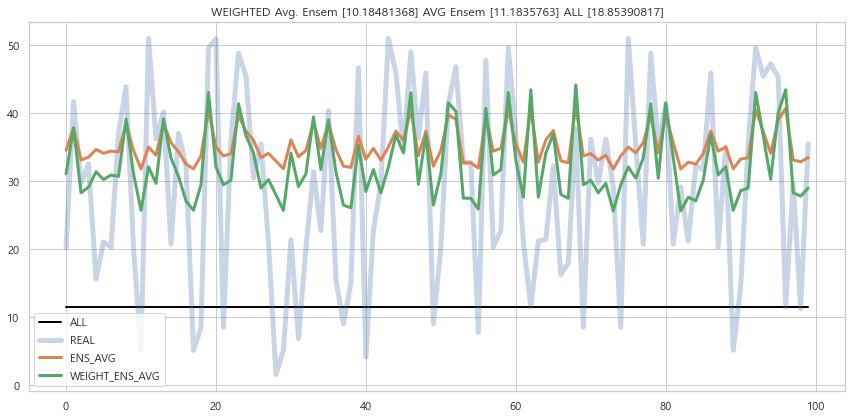

In [21]:
TEST_NUM = 50
WEIGHT_ENS_RESULT = []
ENS_RESULT = []
ALL_RESULT = list(Y_scaler.inverse_transform(np.array(ALL_Y_HAT).reshape(-1,1)).flatten())

ALL_RESULT = np.array(ALL_RESULT)
ALL_RESULT = ALL_RESULT.reshape((int(len(ENS_Y_HATS[0])),))



tmp_ENS_HATS = []
    
    
for i in range(len(ENS_Y_HATS)):
    tmp_ENS_HATS.append(list(Y_scaler.inverse_transform(np.array(ENS_Y_HATS[i]).reshape(-1,1)).flatten()))


for i in range(len(tmp_ENS_HATS[0])):
    tmpWER = 0
    for idx in range(len(tmp_ENS_HATS)):
        tmpWER+= tmp_ENS_HATS[idx][i]*Weighted[i][idx]
        ENS_RESULT.append(tmp_ENS_HATS[idx][i])
    
    WEIGHT_ENS_RESULT.append(tmpWER/(sum(Weighted[i])))

WEIGHT_ENS_RESULT = np.array(WEIGHT_ENS_RESULT)

WEIGHT_ENS_RESULT = WEIGHT_ENS_RESULT.reshape((int(len(ENS_Y_HATS[0])),))
#WEIGHT_ENS_RESULT = WEIGHT_ENS_RESULT.sum(axis=1)/
print(WEIGHT_ENS_RESULT.shape)

ENS_RESULT = np.array(ENS_RESULT)
ENS_RESULT = ENS_RESULT.reshape((int(len(ENS_Y_HATS[0])),len(ENS_Y_HATS)))
ENS_RESULT = ENS_RESULT.mean(axis=1)
print(ENS_RESULT.shape)
print(ALL_RESULT.shape)

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# create data
x = [x for x in range(len(ENS_Y_HATS[0]))]
WER = []
ER = []
AR = []
for i in range(len(enTest_dis_y)):
    WER.append(abs(WEIGHT_ENS_RESULT[i]-enTest_dis_y[i]))
    ER.append(abs(ENS_RESULT[i]-enTest_dis_y[i]))
    AR.append(abs(ALL_RESULT[i]-enTest_dis_y[i]))

plt.title('WEIGHTED Avg. Ensem '+str(sum(WER)/len(WER))+' AVG Ensem '+str(sum(ER)/len(ER))+' ALL '+str(sum(AR)/len(AR)))

plt.plot(x, ALL_RESULT, label = "ALL", color="black", linewidth=2, alpha=1)

plt.plot(x, enTest_dis_y, label = "REAL" , linewidth=5, alpha=0.3)
plt.plot(x, ENS_RESULT, label = "ENS_AVG", linewidth=3, alpha=1)
plt.plot(x, WEIGHT_ENS_RESULT, label = "WEIGHT_ENS_AVG", linewidth=3, alpha=1)
plt.legend()

plt.tight_layout()
plt.savefig(MODEL_PATH+'/Models_Line_Chart.png')
plt.show()



In [22]:

#sum_1 = np.sum(shap_val,axis=1)
import json
with open(MODEL_PATH+'/'+MODEL_NAME+'_FEAT_RANGE.json', "w", encoding='utf8') as outfile: 
    json.dump(FeaturesRange, outfile, ensure_ascii=False)

tp = pd.DataFrame( data = {'Features': Features } )
tp.to_csv(MODEL_PATH+'/'+MODEL_NAME+'_Features.csv')

tp = pd.DataFrame(data = {'TEST_idx': testlinC })
tp.to_csv(MODEL_PATH+'/'+MODEL_NAME+'_TEST_idx.csv')




In [23]:





explainer_list = []
expected_value_list = []
shap_values_list = []

for i in range(len(ENS_MODELS)):
    GNAME = str(i)
    if i == len(ENS_MODELS)-1 and OTHER_FLAG:
        GNAME = 'Other'
    print(str(i)+' 모델 shap 계산중.')
    explainer = shap.DeepExplainer(ENS_MODELS[i], G_TRAIN_X[i])
    expected_value = explainer.expected_value[0]
    shap_values = explainer.shap_values(G_TRAIN_X[i])
    shap_val = shap_values[0].mean(axis=1)
    SH_NP = np.array(shap_val)
    tp = pd.DataFrame(SH_NP, columns=Features)
    tp.to_csv(MODEL_PATH+'/'+MODEL_NAME+'_SHAP_G_'+GNAME+'.csv')

    
    tp = pd.DataFrame( data = {'expected_value': [expected_value] } )
    tp.to_csv(MODEL_PATH+'/'+MODEL_NAME+'_SHAP_EXP'+GNAME+'.csv')
    
    explainer_list.append(explainer)
    expected_value_list.append(expected_value)
    shap_values_list.append(SH_NP)




0 모델 shap 계산중.

1 모델 shap 계산중.


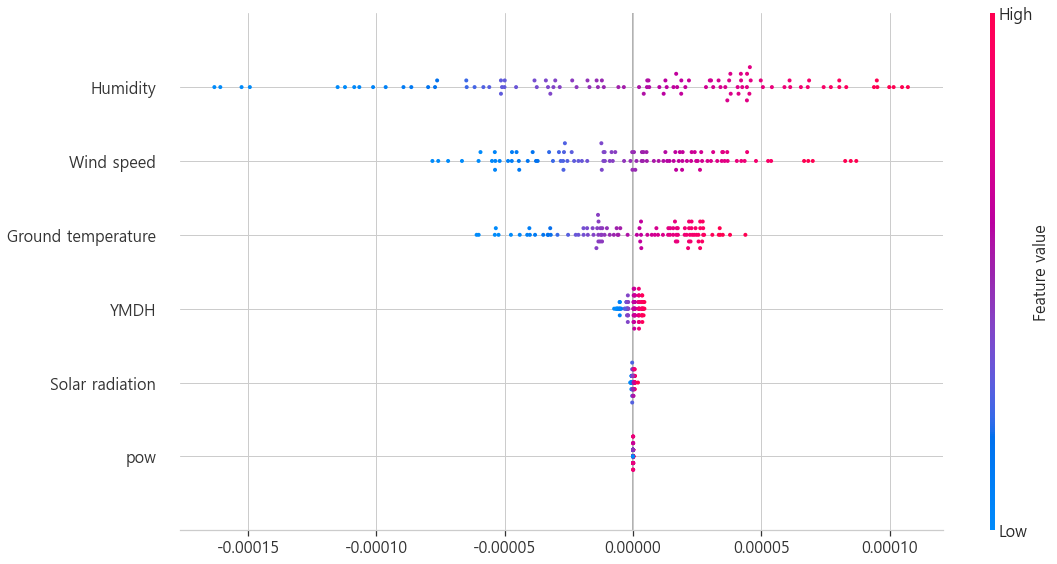

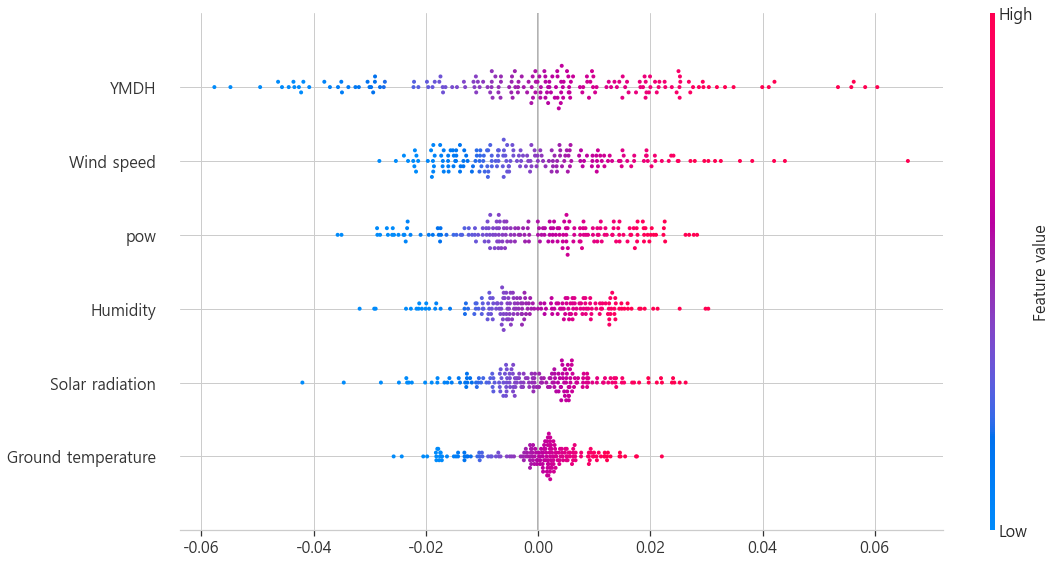

In [24]:
import matplotlib.pyplot as plt

for i in range(len(shap_values_list)):
    GNAME = str(i)
    if i == len(shap_values_list)-1 and OTHER_FLAG:
        GNAME = 'Other'
    _path = MODEL_PATH+'/G_'+GNAME
    
    all_df = pd.DataFrame(shap_values_list[i], columns=Features)
    TEST_EXP = shap.Explanation(
        values = all_df.values, 
        base_values=expected_value_list[i],
        feature_names=Features,
        data = all_df.values)
    
    ax = plt.figure(figsize=(16,8))
    shap.plots.beeswarm(TEST_EXP,show=False,plot_size=(16,8))
        
    plt.xlabel("")
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    axt = ax.get_axes()[-1]
    axt.set_ylabel(axt.get_ylabel(),fontsize=16)
    axt.tick_params(labelsize=16)
    
    
    plt.tight_layout()
    plt.savefig(_path+'/FeatureImportance.png',dpi=150)


AttributeError: 'AxesSubplot' object has no attribute 'savefig'

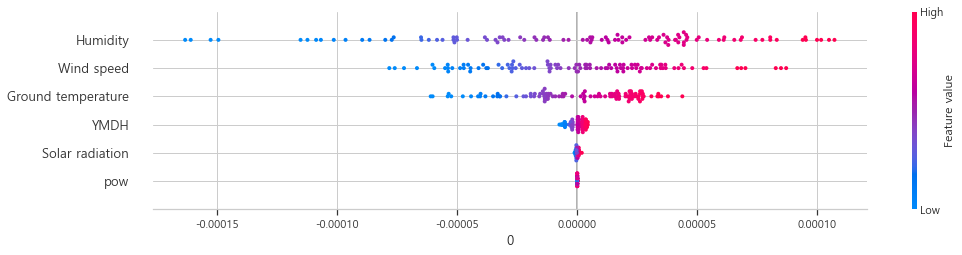

In [25]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(100,20*len(shap_values_list)))
gs = fig.add_gridspec( len(shap_values_list),1)

for i in range(len(shap_values_list)):
    all_df = pd.DataFrame(shap_values_list[i], columns=Features)
    TEST_EXP = shap.Explanation(
        values = all_df.values, 
        base_values=expected_value_list[i],
        feature_names=Features,
        data = all_df.values)
    
    ax = fig.add_subplot(gs[i, 0])
    shap.plots.beeswarm(TEST_EXP,show=False,plot_size=(16,8))
    ax.set_xlabel(str(i))
    ax.savefig(MODEL_PATH+'/Models_beeswarm.png')

plt.tight_layout()
plt.savefig(MODEL_PATH+'/Models_beeswarm.png')
plt.show()

shap_values_list

In [26]:
shap.initjs()
#shap.force_plot(explainer.expected_value.mean(), SH_NP, Features)

In [27]:


import matplotlib.pyplot as plt

for i in range(len(shap_values_list)):
    GNAME = str(i)
    if i == len(shap_values_list)-1 and OTHER_FLAG:
        GNAME = 'Other'
    _path = MODEL_PATH+'/G_'+GNAME
    shap.save_html(_path+'/Models_cluster.html',shap.force_plot(expected_value_list[i], shap_values_list[i], Features,matplotlib=False),full_html=False)
    
    

In [28]:
shap.force_plot(expected_value_list[0], shap_values_list[0][:100], Features,matplotlib=False)

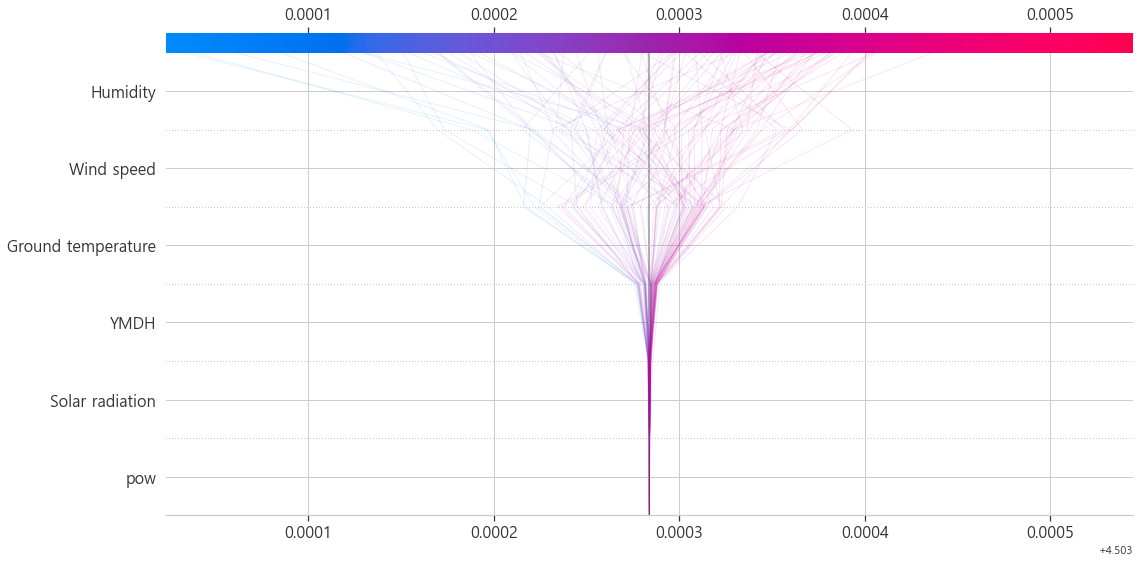

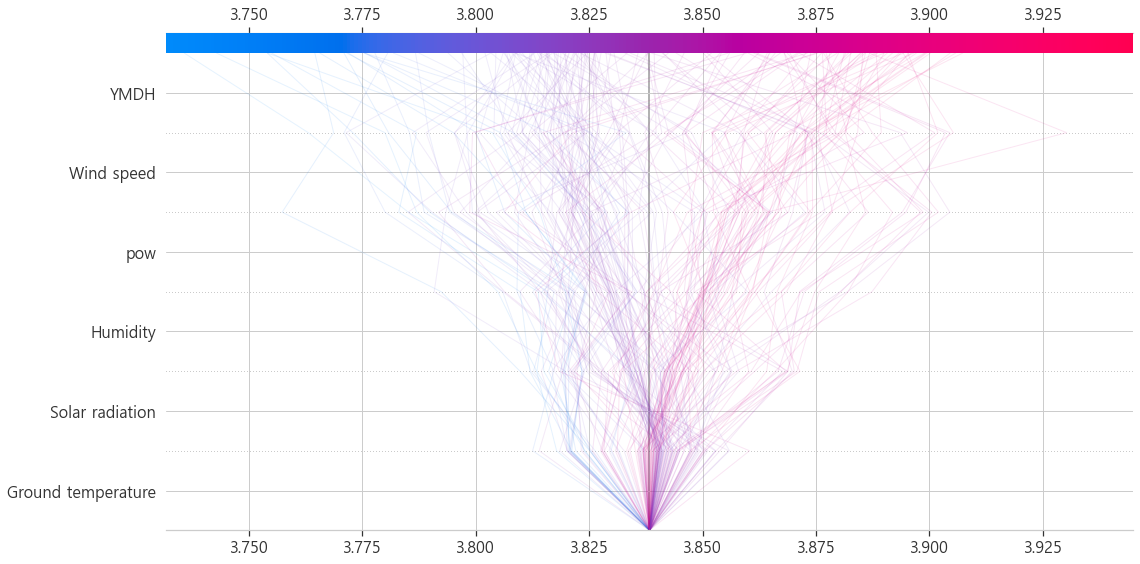

In [29]:
'''
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(16,8*len(shap_values_list)))
gs = fig.add_gridspec(len(shap_values_list), 1)

for i in range(len(shap_values_list)):
    all_df = pd.DataFrame(shap_values_list[i], columns=Features).values
    ax = fig.add_subplot(gs[i, 0])
    #all_df = all_df.reshape((24,int(all_df.shape[0]/24/24),24,len(Features)))

    #all_df= all_df.reshape((all_df.shape[0]*all_df.shape[1],all_df.shape[2]))
    shap.decision_plot(expected_value_list[i], all_df, all_df, feature_names=Features, ignore_warnings=True,auto_size_plot=False,show=False,alpha=0.1)
    ax.set_xlabel(str(i))

plt.tight_layout()
plt.savefig(MODEL_PATH+'/Models_decision.png')
plt.show()

'''
import matplotlib.pyplot as plt

for i in range(len(shap_values_list)):
    GNAME = str(i)
    if i == len(shap_values_list)-1 and OTHER_FLAG:
        GNAME = 'Other'
    _path = MODEL_PATH+'/G_'+GNAME
    
    all_df = pd.DataFrame(shap_values_list[i], columns=Features).values
    
    ax = plt.figure(figsize=(16,8))
    shap.decision_plot(expected_value_list[i], all_df, all_df, feature_names=Features, ignore_warnings=True,auto_size_plot=False,show=False,alpha=0.1)
        
    plt.xlabel("")
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    axt = ax.get_axes()[-1]
    axt.set_ylabel(axt.get_ylabel(),fontsize=16)
    axt.tick_params(labelsize=16)
    
    
    plt.tight_layout()
    plt.savefig(_path+'/Models_decision.png',dpi=150)


In [30]:
COLORS = ['#5567ED', '#ED6D73', '#CE6EEB', '#EDC43E', '#4AED72']
reversed(COLORS)
def renderICE(_Model,_X_DATA,check_col, C_list, ax):
    for _M in range(len(_Model)):
        ICE_d = pd.DataFrame(np.empty((_X_DATA[_M].shape[0], len(C_list))), columns = C_list)
        C_train = pd.DataFrame(_X_DATA[_M].reshape((_X_DATA[_M].shape[0]*24,len(Features))),columns=Features).copy()
        for C in C_list:
            C_train[Features[check_col]] = C
            values = C_train.values
            values = values.reshape((int(C_train.shape[0]/24),24,len(Features)))
        
            y_hat = _Model[_M].predict(values)
            #y_hat = y_hat.mean(axis=1)
            
            y_hat = y_hat.flatten()
        
            ICE_d[C] = list(y_hat)
            
        for i in range(_X_DATA[_M].shape[0]):
        #for i in range(_X_DATA[_M].shape[0]):
            ax.plot(ICE_d.T.index, ICE_d.T[i], color = COLORS[_M], linewidth = 0.2 , alpha=0.3)
        ND = np.array(ICE_d)
    
        ND = np.average(ND,axis=0)
        ax.plot(ICE_d.T.index, ND, color = 'black', linewidth = 3.0)
        ax.plot(ICE_d.T.index, ND, color = COLORS[_M], linewidth = 2.0)
        print(ICE_d.size)
        ICE_d.to_csv(MODEL_PATH+'/'+MODEL_NAME+'_'+str(_M)+'_ICE_'+str(check_col)+'.csv')

    print('ICE값 저장')
    ax.set_title(Features[check_col])

1144
2057
ICE값 저장
1144
2057
ICE값 저장
1144
2057
ICE값 저장
1144
2057
ICE값 저장
1144
2057
ICE값 저장
1144
2057
ICE값 저장


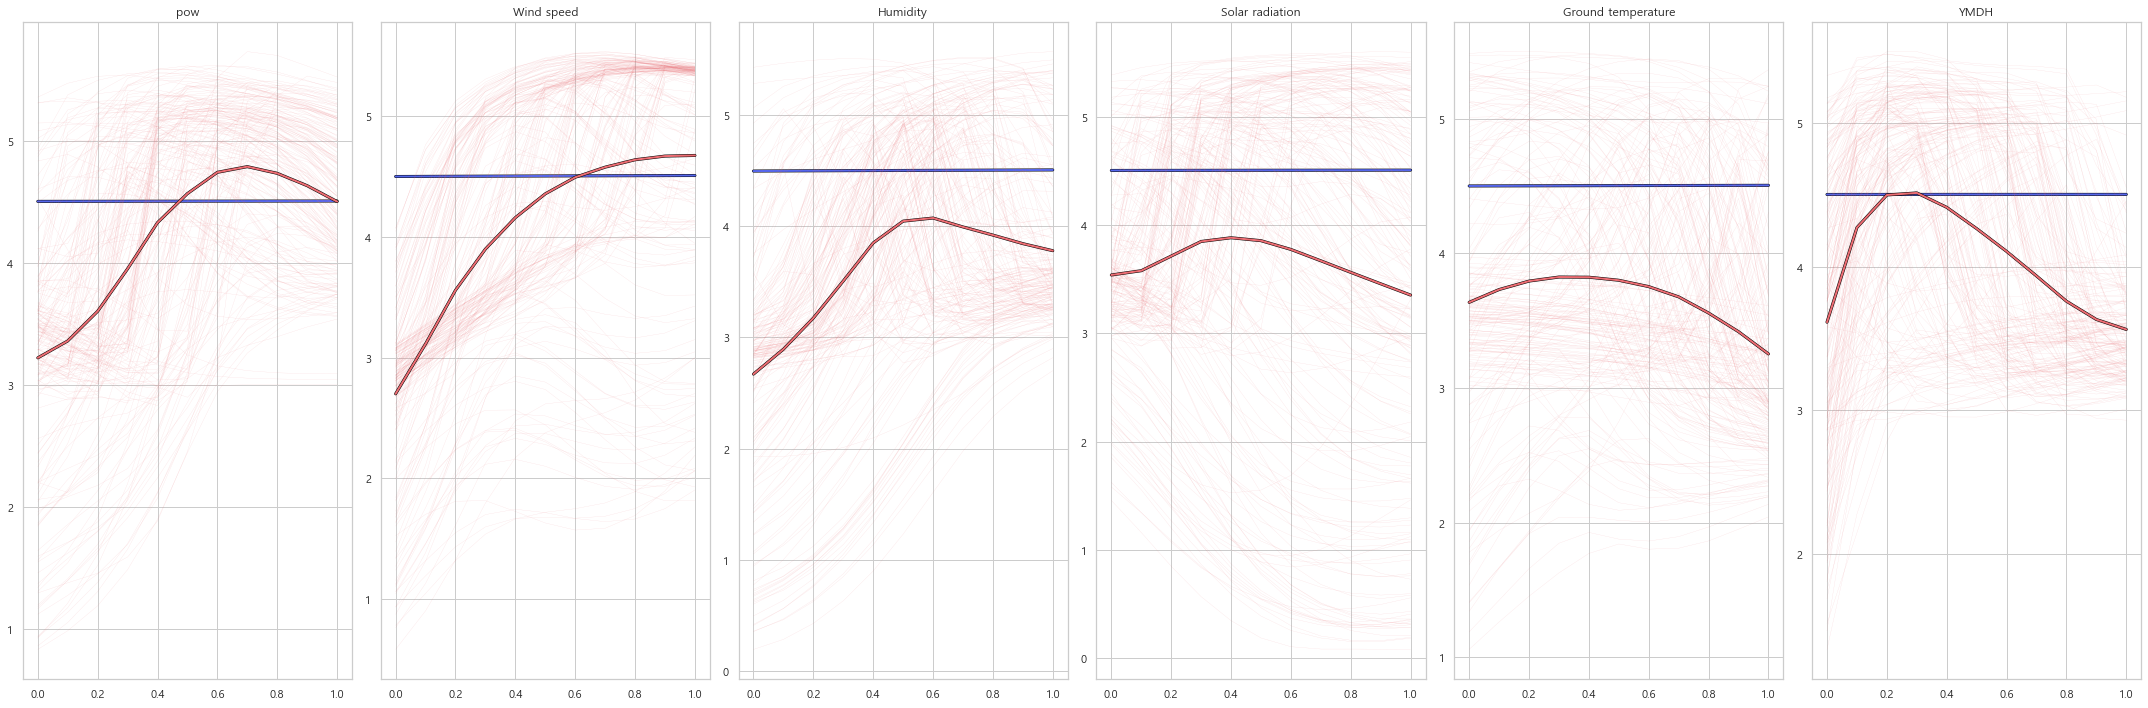

In [31]:
import json
fig = plt.figure(figsize=(5*len(Features), 10))
C_list = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
#C_list = [0,1.0]
for i in range(len(Features)):
    renderICE(ENS_MODELS,G_TRAIN_X, i, C_list, fig.add_subplot(1, len(Features), i+1))
plt.tight_layout()
plt.savefig(MODEL_PATH+'/Models_ICE.png')
plt.show()

In [32]:
COLORS = ['#5567ED', '#ED6D73', '#CE6EEB', '#EDC43E', '#4AED72']
reversed(COLORS)
def renderICE_DE(_Model,_X_DATA,check_col, C_list, ax):
    ICE_d = pd.DataFrame(np.empty((_X_DATA.shape[0], len(C_list))), columns = C_list)
    
    for C in C_list:
        C_train = pd.DataFrame(_X_DATA.reshape((_X_DATA.shape[0]*24,len(Features))),columns=Features).copy()
        WEIGHT_ENS_RESULT = []
        ENS_Y_HATS = []
        for _M in range(len(_Model)):
            C_train[Features[check_col]] = C
            values = C_train.values
            values = values.reshape((int(C_train.shape[0]/24),24,len(Features)))
        
            y_hat = _Model[_M].predict(values)
            #y_hat = y_hat.mean(axis=1)
        
            y_hat = y_hat.flatten()
            ENS_Y_HATS.append(y_hat)
            
        for idx in range(len(ENS_Y_HATS[0])):
            tmpWER = 0
            for i in range(len(ENS_Y_HATS)):
                tmpWER+=((ENS_Y_HATS[i][idx])*Weighted[idx][i])
            WEIGHT_ENS_RESULT.append(tmpWER/(sum(Weighted[idx])))
        WEIGHT_ENS_RESULT = np.array(WEIGHT_ENS_RESULT)
        
        ICE_d[C] = list(WEIGHT_ENS_RESULT)
            
    for i in range(_X_DATA.shape[0]):
        #for i in range(_X_DATA[_M].shape[0]):
            ax.plot(ICE_d.T.index, ICE_d.T[i], color = COLORS[0], linewidth = 0.2 , alpha=0.3)
            
    ND = np.array(ICE_d)
    ND = np.average(ND,axis=0)
    ax.plot(ICE_d.T.index, ND, color = 'black', linewidth = 3.0)
    ax.plot(ICE_d.T.index, ND, color = COLORS[0], linewidth = 2.0)
    print(ICE_d.size)
        #ICE_d.to_csv(MODEL_PATH+'/'+MODEL_NAME+'_'+str(_M)+'_ICE_'+str(check_col)+'.csv')

    #print('ICE값 저장')
    ax.set_title(Features[check_col])

In [33]:
Weighted = np.zeros((ALL_TRAIN_X.shape[0],(len(models)+1) if OTHER_FLAG else (len(models))), dtype=int)
for i in range(ALL_TRAIN_X.shape[0]):
    for Key in FeaturesRange:
        for FILTERS in FeaturesRange[Key]:
            FT = FeaturesRange[Key][FILTERS][0]
            tempMEAN = ALL_TRAIN_X[i].mean(axis=0)
            if tempMEAN[Features.index(FILTERS)]<=FT[0] and tempMEAN[Features.index(FILTERS)]>FT[1]:
                Weighted[i][int(Key)] = 1
    if sum(Weighted[i])==0:
        Weighted[i][-1]=1            
Weighted

array([[0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0,

3201
3201
3201
3201
3201
3201


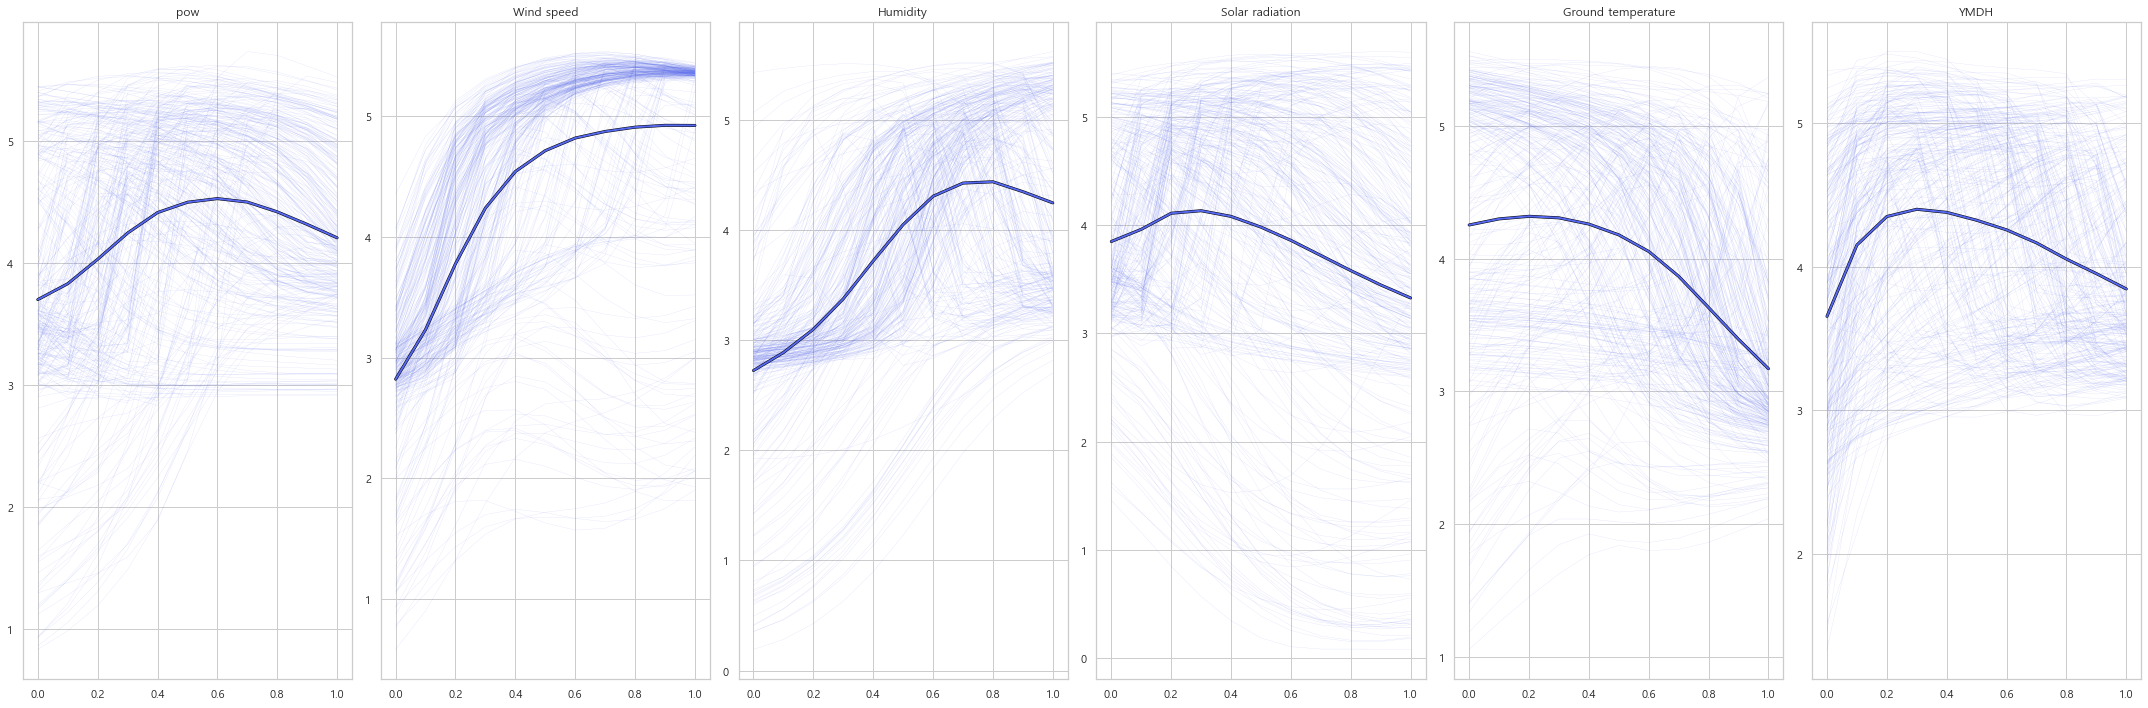

In [34]:
import json
fig = plt.figure(figsize=(5*len(Features), 10))
C_list = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
#C_list = [0,1.0]
for i in range(len(Features)):
    renderICE_DE(ENS_MODELS,ALL_TRAIN_X, i, C_list, fig.add_subplot(1, len(Features), i+1))
    
plt.tight_layout()
plt.savefig(MODEL_PATH+'/Models_DE_ICE.png')
plt.show()